In [1]:
import numpy as np
np.random.seed(1018)
import matplotlib.pyplot as plt
import random as rm
import pandas as pd
from sklearn import preprocessing
from keras.layers import TimeDistributed,Dense,GRU,Dropout,LSTM,Activation
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop

INDEX = 0
TIME_STEPS = 20
BATCH_SIZE = 1
INPUT_SIZE = 1
CELL_SIZE = 128
LR = 0.0001

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


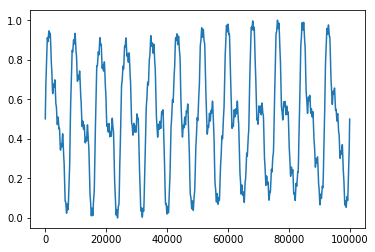

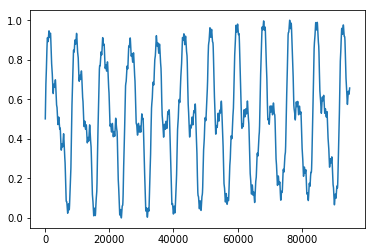

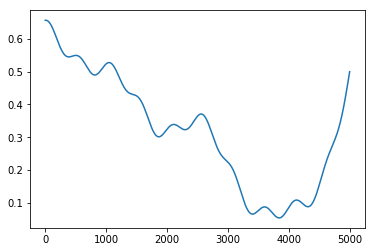

In [2]:
# data = pd.read_csv('ECG.csv',header=None)
data = pd.read_csv('synthetic.txt',sep='\s+',header=None)
# dataset = data[1][2::].values.reshape(-1, 1)
dataset = data[9][1::].values.reshape(-1, 1)
dataset = dataset.astype(np.float64)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
dataset = data_scaler.fit_transform(dataset)
plt.plot(dataset)
plt.show()
train = dataset[0:95000]
test = dataset[95000:100000]
plt.figure()
plt.plot(train)
plt.show()
plt.figure()
plt.plot(test)
plt.show()

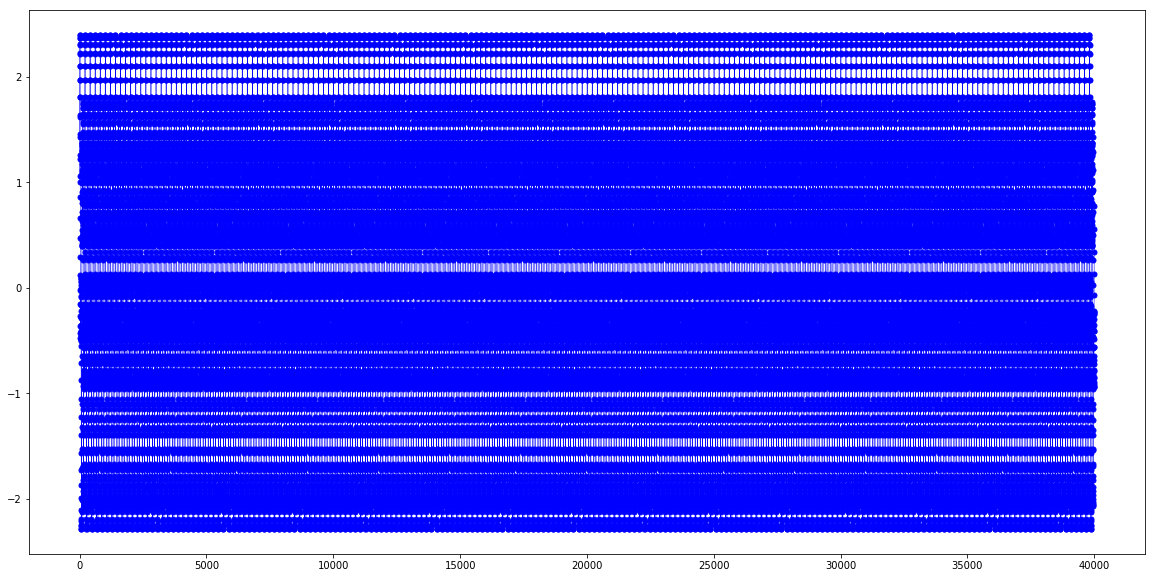

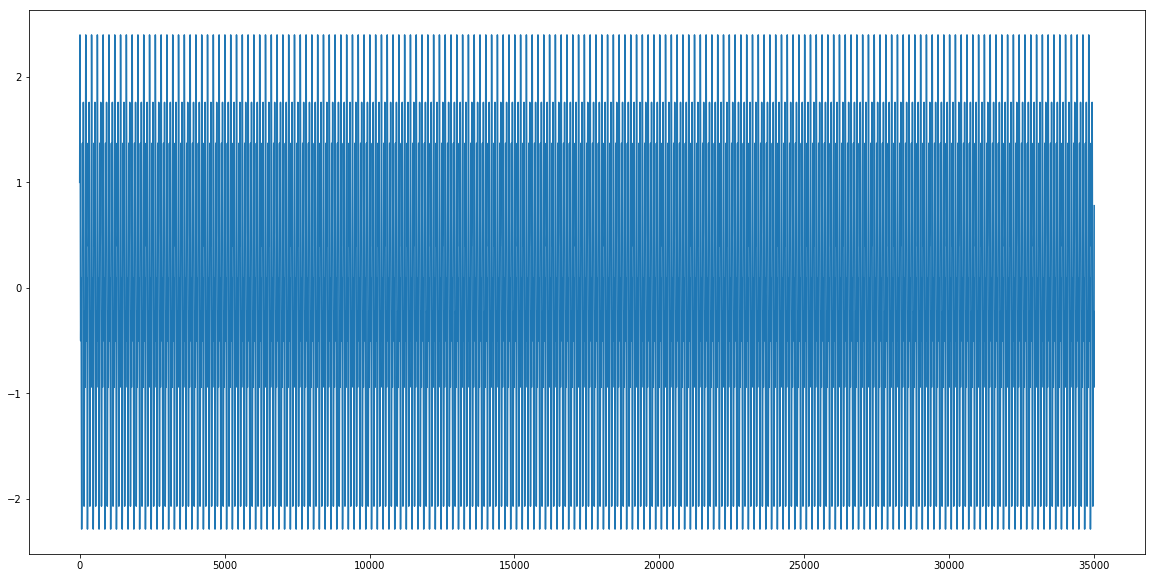

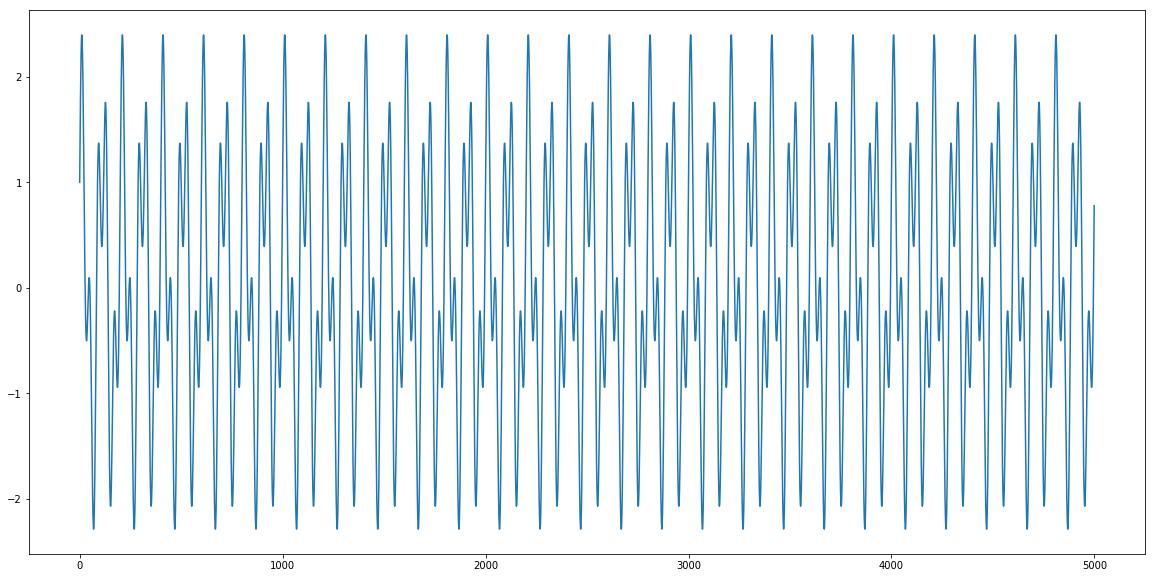

In [3]:
x = np.arange(40000)
# y = np.random.uniform(0,0.05,x.shape)+np.sin(x)
# x = np.arange(40000)
noise = np.random.uniform(0,0.05,x.shape)
y = np.sin(np.pi*x/50)+np.sin(np.pi*x/20)+np.cos(np.pi*x/50)
# y = noise+np.sin(np.pi*x/50)+noise
dataset = y.reshape(-1,1)
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# dataset = data_scaler.fit_transform(y.reshape(-1, 1))
plt.figure(figsize=(20,10))
# plt.xlim(x.min()*1.1,x.max()*1.1,)
# plt.ylim(y.min()*1.1,y.max()*1.1)
plt.plot(dataset,"bo-",linewidth=0.5, markersize=5)
plt.show()
train = dataset[0:35000]
test = dataset[35000:40000]
plt.figure(figsize=(20,10))
plt.plot(train)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(test)
plt.show()

In [2]:
# data = pd.read_csv('ECG.csv',header=None)
# dataset = data[1][2::].values.reshape(-1, 1)
# dataset = dataset.astype(np.float64)
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
# dataset = data_scaler.fit_transform(dataset)
# plt.plot(dataset)
# plt.show()
# train = dataset[170000::]
# test = dataset[100000:170000]
# plt.figure()
# plt.plot(train)
# plt.show()
# plt.figure()
# plt.plot(test)
# plt.show()

In [3]:
# data = pd.read_csv('ann.txt',sep='  ',header=None)
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# dataset = data_scaler.fit_transform(data[0][:-1].reshape(-1, 1))
# plt.figure(figsize=(50,30))
# # plt.plot(dataset[3000:7000])
# plt.plot(dataset)
# plt.show()

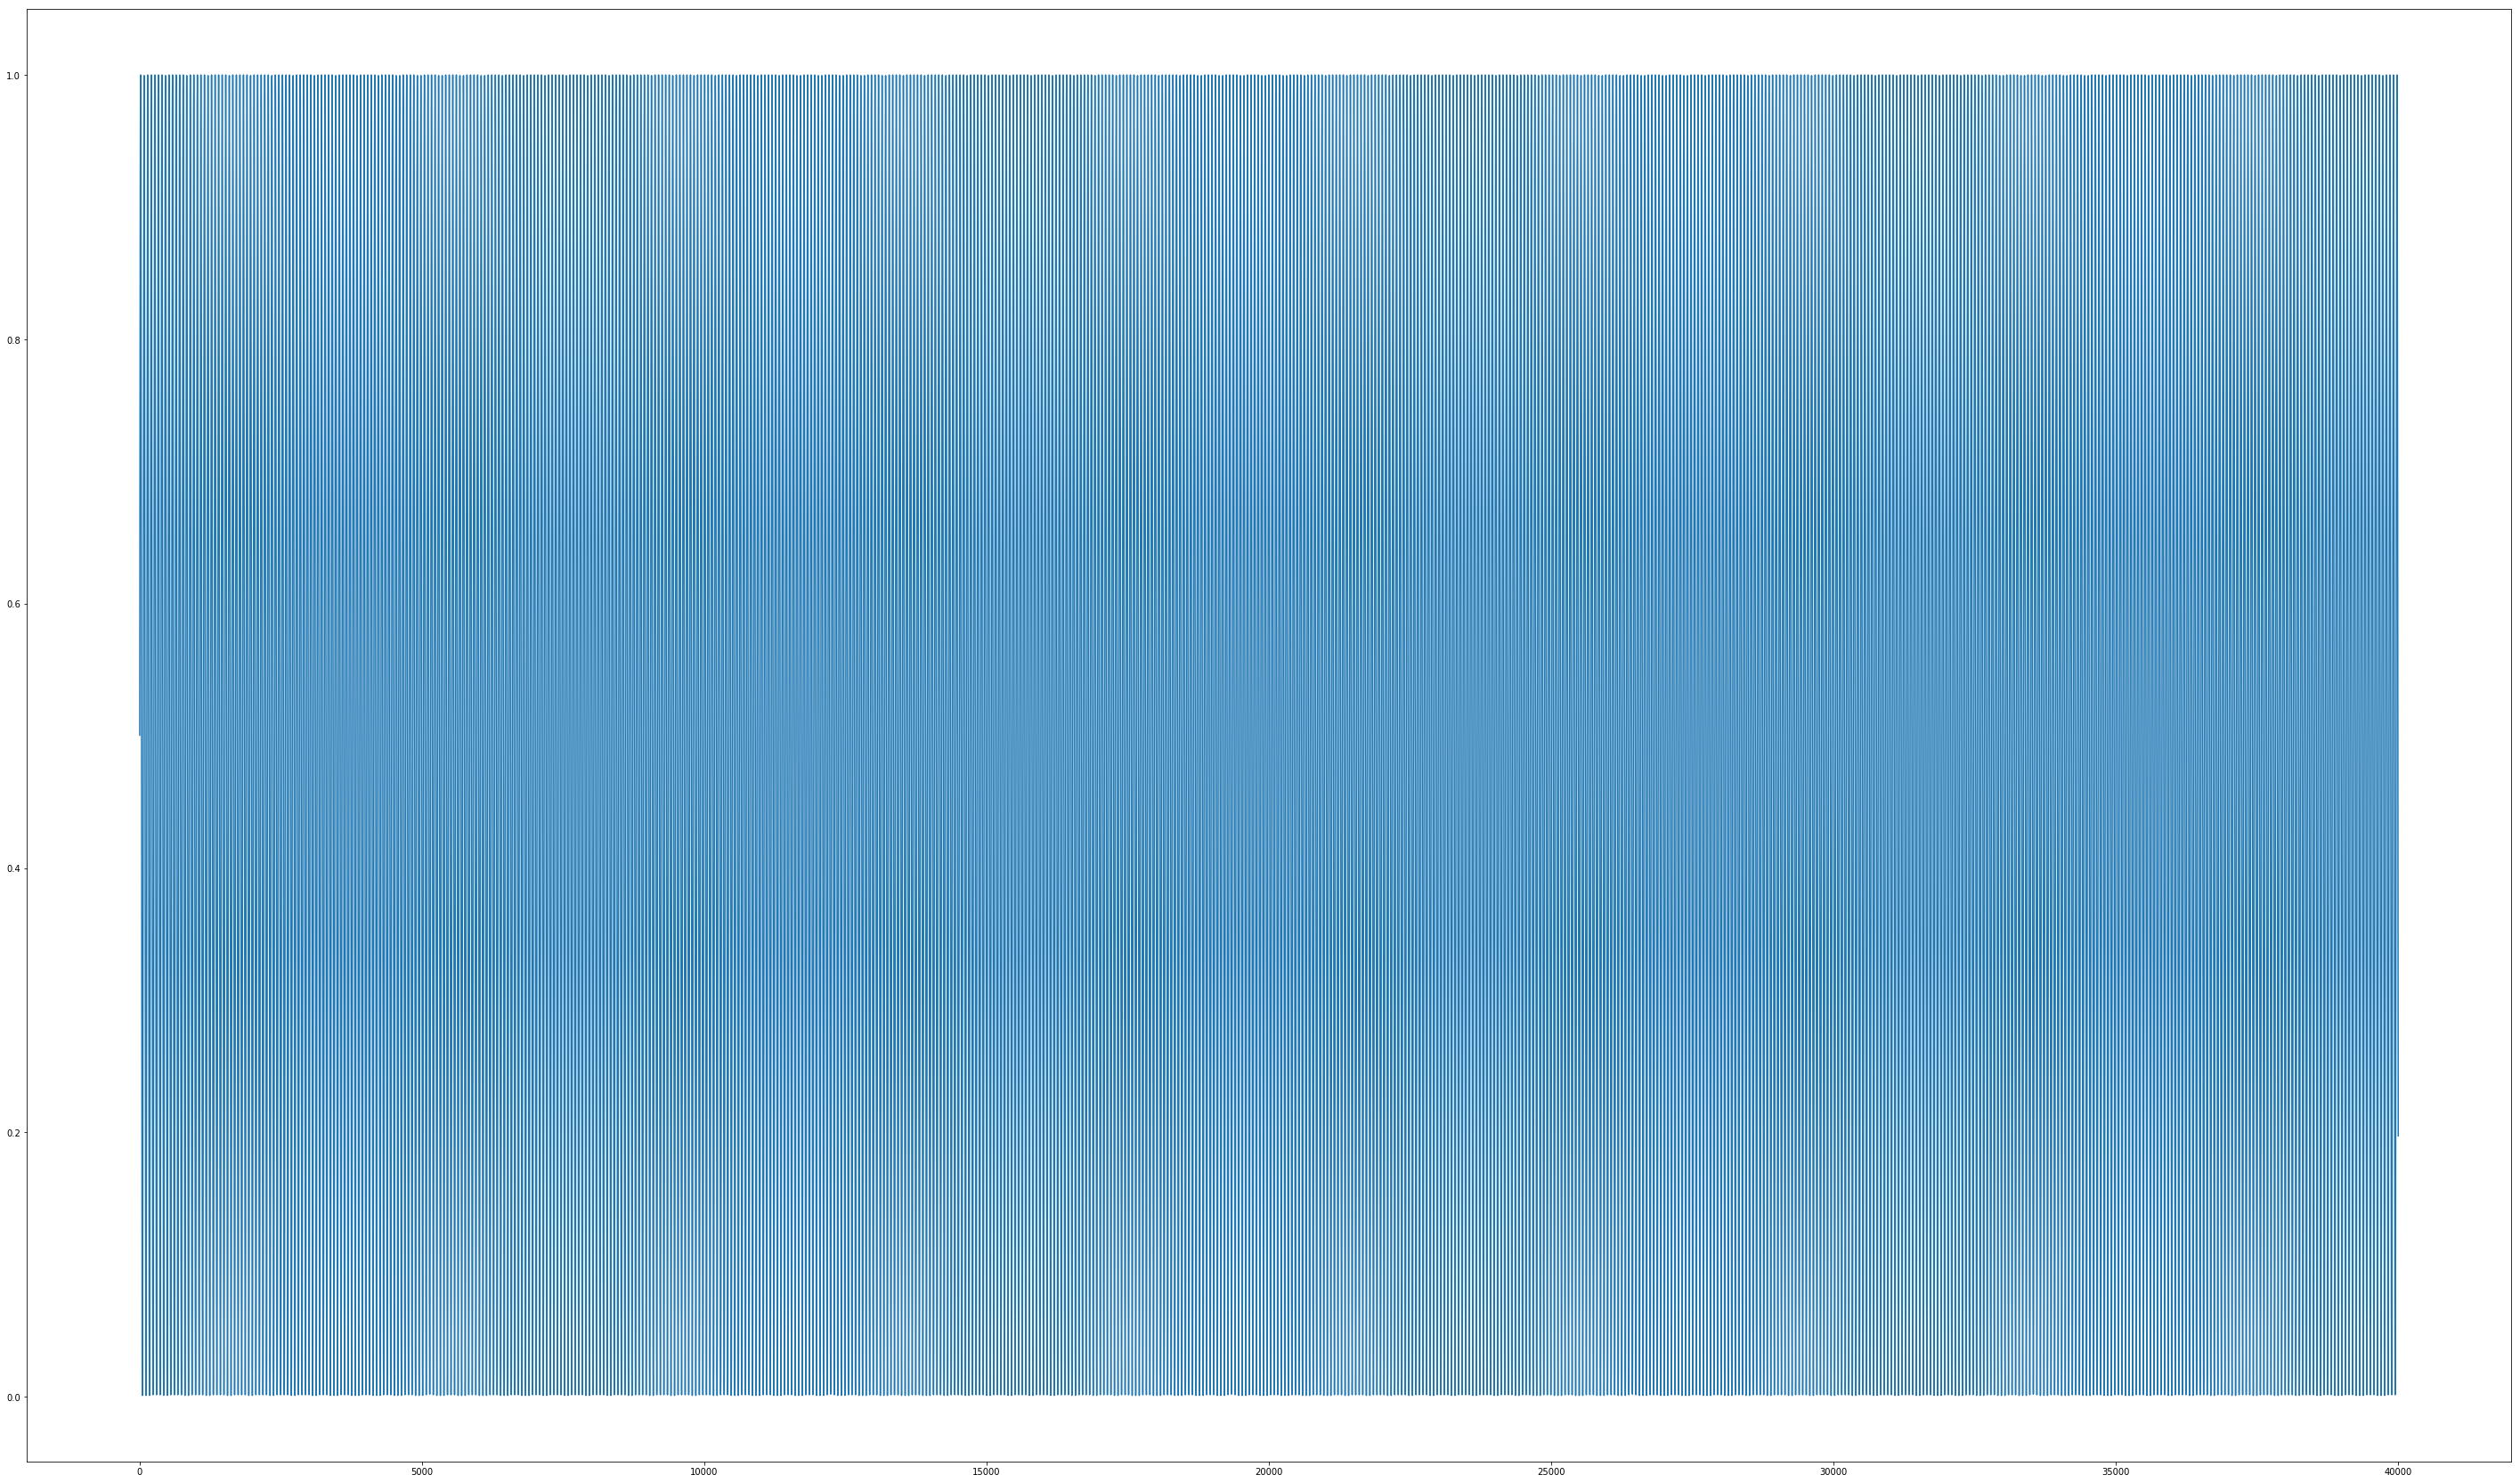

In [2]:
x = np.arange(0,4000,0.1)
indice = x.shape[0]
y = rm.uniform(-0.5,0.5)+np.sin(x)
data = np.round(y,3).reshape(-1,1)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
dataset = data_scaler.fit_transform(data)
plt.figure(figsize=(50,30))
# plt.plot(dataset[3000:7000])
plt.plot(dataset)
plt.show()

In [5]:
# data = pd.read_csv('chfdb_chf01_275.txt',sep='\t',header=None)
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0.1,1))
# dataset = data_scaler.fit_transform(data[2][:-1].reshape(-1, 1))
# plt.figure(figsize=(50,30))
# plt.plot(dataset)
# plt.show()

In [6]:
# data = pd.read_csv('synthetic.txt',sep='\t',header=None)
data = pd.read_csv('synthetic.txt',sep='\s+',header=None)

In [7]:
data[9][1::].min()

-0.18554957

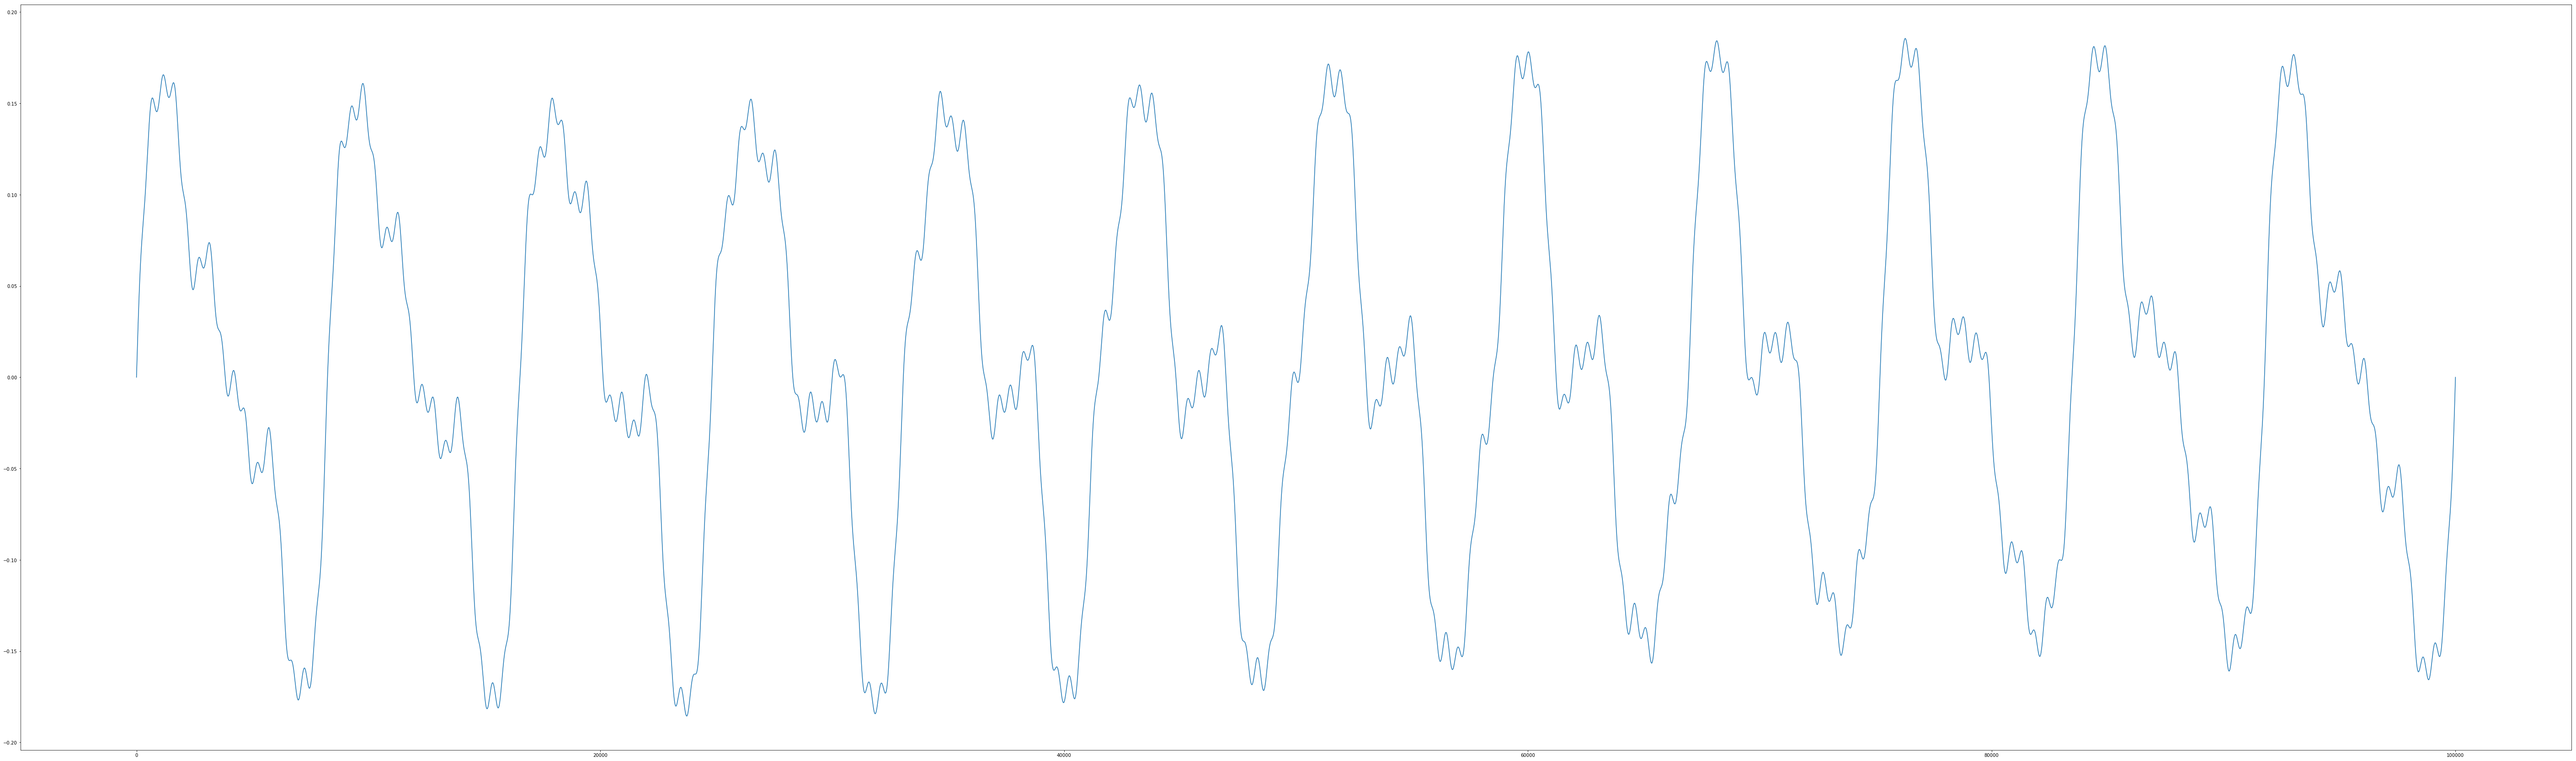

In [8]:
plt.figure(figsize=(100,30))
plt.plot(data[9])
plt.show()

In [3]:
dataset = data[9][1::].values.reshape(-1, 1)
dataset = dataset.astype(np.float64)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
dataset = data_scaler.fit_transform(dataset)
plt.plot(dataset)
plt.show()
# train = dataset[170000::]
# test = dataset[100000:170000]
# plt.figure()
# plt.plot(train)
# plt.show()
# plt.figure()
# plt.plot(test)
# plt.show()
dataset.min()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [5]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
dataset = data_scaler.fit_transform(dataset)
dataset = (dataset*1000).astype(np.int32)
print(dataset.shape)
enconder = preprocessing.OneHotEncoder()
enconder.fit(dataset)
dataset = enconder.transform(dataset).toarray()

(40000, 1)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
dataset.shape

(40000, 177)

In [5]:
#synthetic
train = dataset[0:95000]
test = dataset[95000:100000]

In [7]:
#sin
train = dataset[0:35000]
test = dataset[35000:40000]

In [14]:
# train = dataset[0:2250,:]
# test = dataset[2250::,:]

In [7]:
train.shape

(35000, 1000)

In [8]:
def GetBatch(data,BATCH_SIZE,TIME_STEPS):
    data_X = []
    data_y = []
#    for INDEX in range(0,len(data)-2*TIME_STEPS*BATCH_SIZE,TIME_STEPS*BATCH_SIZE):
    for INDEX in range(0,len(data)-TIME_STEPS*BATCH_SIZE):
        X_step = data[INDEX:INDEX+TIME_STEPS*BATCH_SIZE,:]
#         y_step = data[INDEX+TIME_STEPS*BATCH_SIZE:INDEX+TIME_STEPS*BATCH_SIZE*2]
        y_step = data [INDEX+TIME_STEPS*BATCH_SIZE,:]
        data_X.append(X_step)
        data_y.append(y_step)
    return np.array(data_X),np.array(data_y)

In [8]:
def GetBatch(data,BATCH_SIZE,TIME_STEPS):
    global INDEX
    if INDEX+TIME_STEPS >=len(data):
        INDEX =0
    X_step = data[INDEX:INDEX+TIME_STEPS]
    y_step = data[INDEX+TIME_STEPS]
    INDEX+=TIME_STEPS
    return np.array(X_step)[np.newaxis,:,:],np.array(y_step).reshape(1,-1)

In [33]:
# trainX,trainy = GetBatch(train,BATCH_SIZE,TIME_STEPS)
# testX,testy = GetBatch(test,BATCH_SIZE,TIME_STEPS)

In [34]:
# trainX.shape

In [35]:
# 1 in trainX[2][9]

In [36]:
# trainX[2][9] == trainy[1]

In [37]:
# trainy.shape[1]

In [9]:
model = Sequential()
model.add(LSTM(CELL_SIZE, input_shape=(TIME_STEPS, train.shape[1])))
# model.add(Dropout(0.2))
model.add(Dense(train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [10]:
for i in range(20001):
    X_batch,Y_batch = GetBatch(train,BATCH_SIZE,TIME_STEPS)
    cost = model.train_on_batch(X_batch,Y_batch)
    if i %1000 ==0:
        print("loss:",cost)

loss: 6.90377
loss: 4.448516
loss: 5.405162
loss: 4.253599
loss: 4.507526
loss: 5.6625147
loss: 3.6116197
loss: 6.1369777
loss: 3.5653203
loss: 4.3589506
loss: 3.3414946
loss: 3.5157495
loss: 3.2348485
loss: 2.6207075
loss: 7.183819
loss: 1.5986803
loss: 1.8107738
loss: 1.4965861
loss: 0.6530729
loss: 0.5626104
loss: 0.6193722


In [22]:
model.fit(trainX, trainy, batch_size=BATCH_SIZE,epochs=5)

Epoch 1/5
94990/94990 [==============================] - 922s - loss: 0.5664   
Epoch 2/5
94990/94990 [==============================] - 920s - loss: 0.3625   
Epoch 3/5
94990/94990 [==============================] - 936s - loss: 0.3628   
Epoch 4/5
94990/94990 [==============================] - 936s - loss: 0.3746   
Epoch 5/5
94990/94990 [==============================] - 928s - loss: 0.3870   


In [37]:
def prediction(batch_size,time_step,X_test):
    X_test = X_test.reshape(-1,X_test.shape[0],X_test.shape[1])
    y_pred = model.predict(X_test, batch_size=batch_size)
    return y_pred

In [38]:
predictions = []
for num in X_batch.squeeze():
    predictions.append(num.tolist())
y_pred = Y_batch

In [39]:
False in (predictions == X_batch)

False

In [40]:
False in (np.array(predictions[-TIME_STEPS::]) == X_batch)

False

In [41]:
for i in range(1,300):
    X ,y= X_batch,Y_batch
    y_pred = prediction(BATCH_SIZE,TIME_STEPS,np.array(predictions[-TIME_STEPS::]))
    predictions.append(y_pred.squeeze().tolist())

In [42]:
len(predictions)

309

In [43]:
len(predictions[0])

1000

In [44]:
sequence = np.argmax(predictions, axis=1)/1000

In [45]:
sequence.shape

(309,)

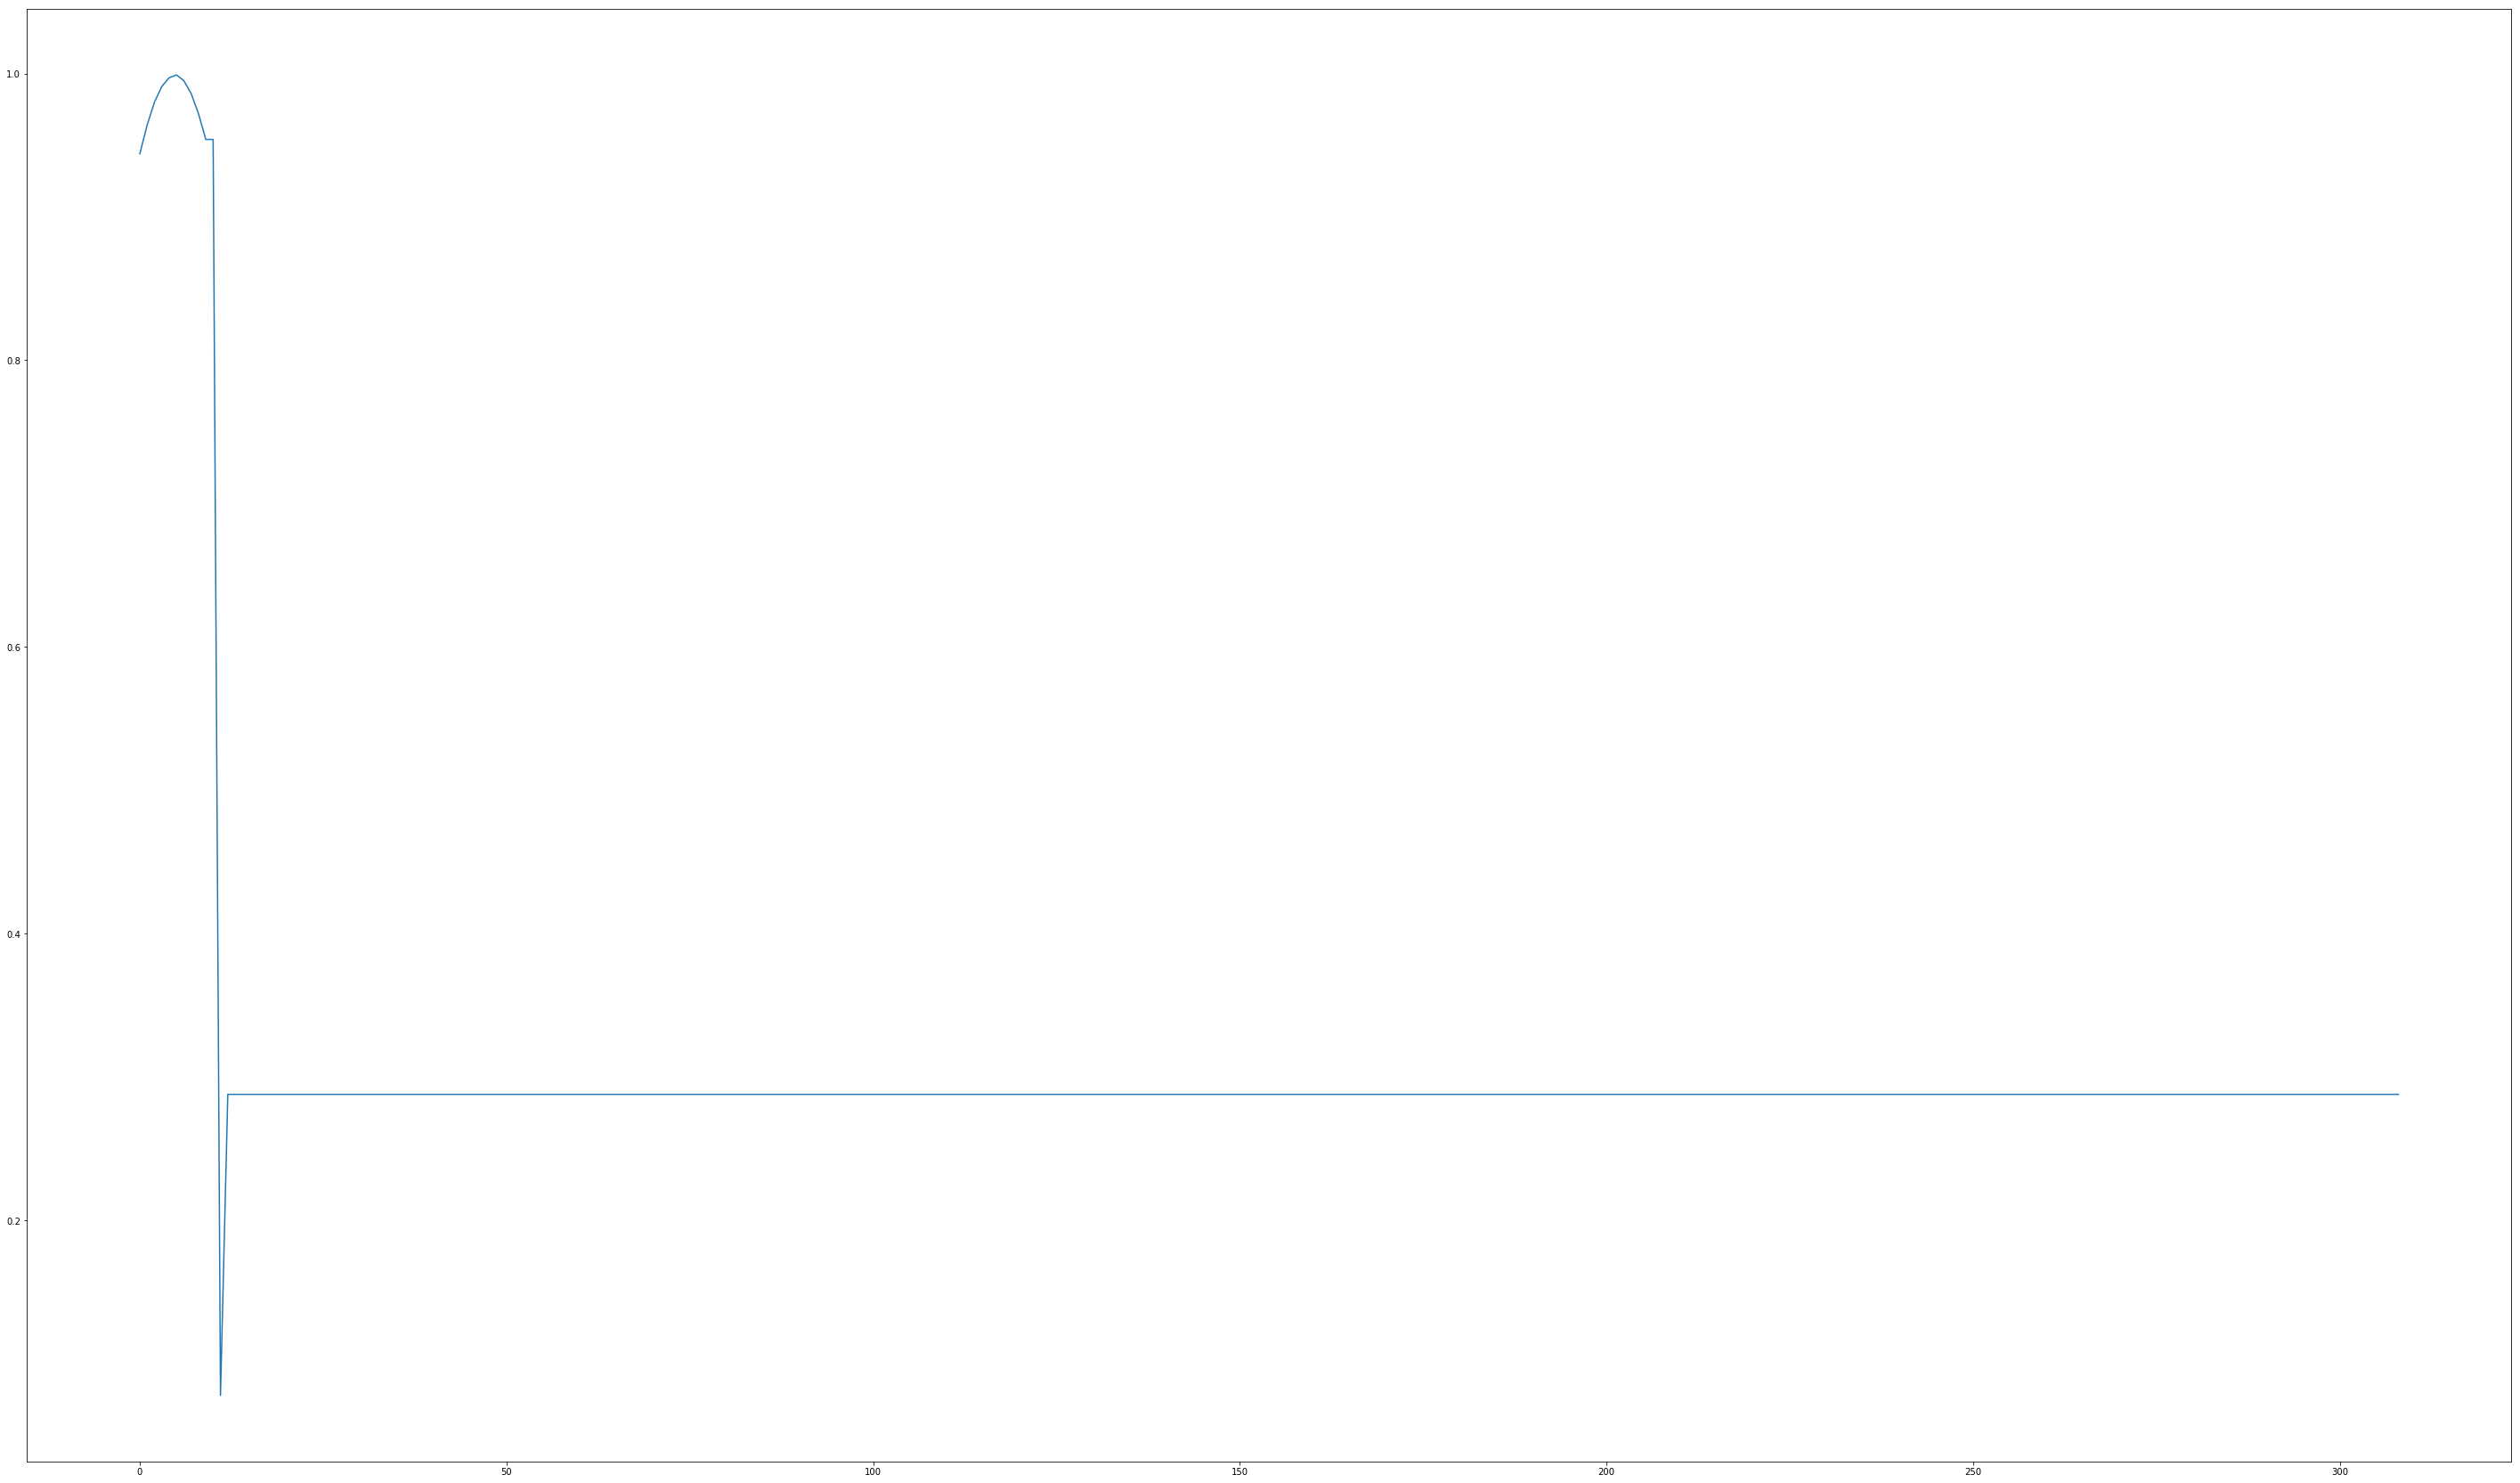

In [46]:
plt.figure(figsize=(50,30))
plt.plot(sequence)
# plt.plot(np.argmax(testy,axis=1)/1000)
plt.show()

In [54]:
test =GetBatch(test,TIME_STEPS,BATCH_SIZE)

In [69]:
np.argmax(testy,axis=1)

array([936])

In [75]:
sequence

array([ 0.944,  0.964,  0.98 ,  0.991,  0.997,  0.999,  0.995,  0.986,
        0.972,  0.954,  0.954,  0.078,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
        0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,  0.288,
      

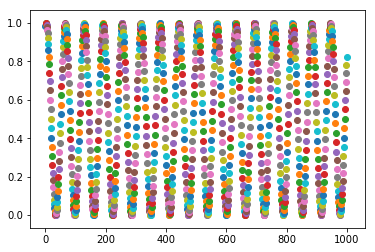

In [74]:
for i in range(1000):
    testX,testy = GetBatch(test,TIME_STEPS,BATCH_SIZE)
    plt.scatter(i,np.argmax(testy,axis=1)/1000,)
plt.show()